In [1]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Union
import seaborn as sns
import scipy

/slurm/home/yrd/liaolab/caohaoxue/anaconda3/envs/my_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
adata_real = sc.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/data_standard/E12_to_CS10_sum1e4.h5ad')

In [3]:
X = adata.layers['counts']
zeros_per_cell = (X == 0).sum(axis=1)/len(adata.var.index)
adata.X.sum(axis = 1)
adata.obs['n_zero_genes'] = zeros_per_cell

X = adata.X
zeros_per_cell = (X == 0).sum(axis=1)/len(adata.var.index)
adata.X.sum(axis = 1)
adata.obs['n_zero_genes_norm'] = zeros_per_cell

/tmp/ipykernel_17413/4161148613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_17413/4161148613.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='time', ylabel='n_zero_genes_norm'>

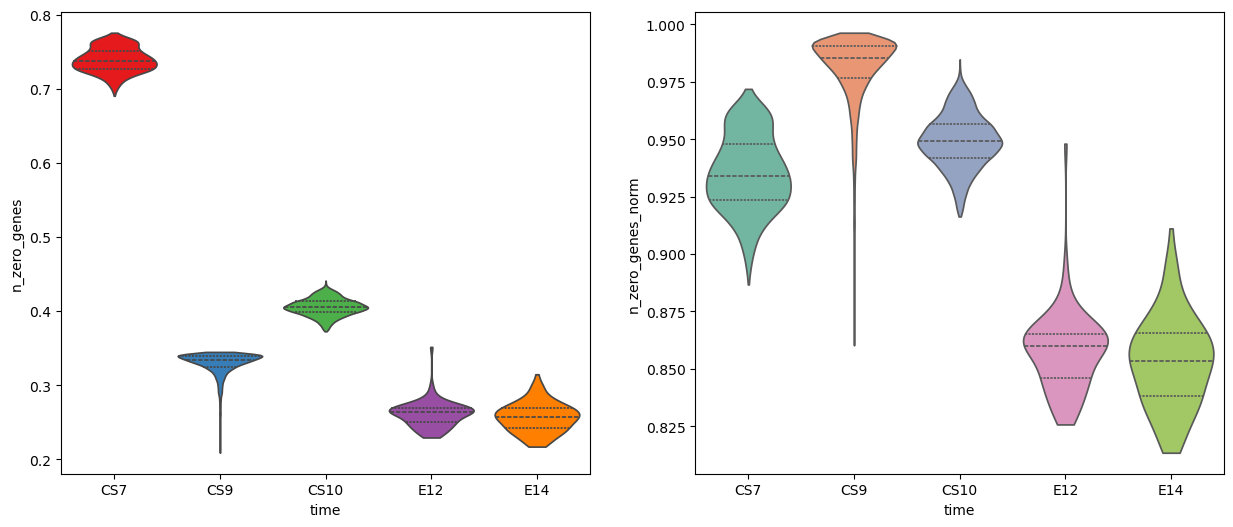

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.violinplot(
    x="time",        # X轴分类变量
    y="n_zero_genes", # Y轴数值变量
    data=adata.obs,      # 数据源
    palette="Set1", # 颜色方案
    inner="quartile", # 内部显示四分位线（可选：'box', 'point', 'stick', None）
    cut=0,          # 限制小提琴范围（0=不超出数据范围）
    saturation=1, # 颜色饱和度
    ax=axes[0]
)

sns.violinplot(
    x="time",        # X轴分类变量
    y="n_zero_genes_norm", # Y轴数值变量
    data=adata.obs,      # 数据源
    palette="Set2", # 颜色方案
    inner="quartile", # 内部显示四分位线（可选：'box', 'point', 'stick', None）
    cut=0,          # 限制小提琴范围（0=不超出数据范围）
    saturation=0.75, # 颜色饱和度
    ax=axes[1]
)

In [119]:
adata = an.read_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/simulation_sc/CS8f_VAE_normalizedX_euc_lr1e4_clustered.h5ad')

/tmp/ipykernel_17413/1558944965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='time', ylabel='n_zero_genes_norm'>

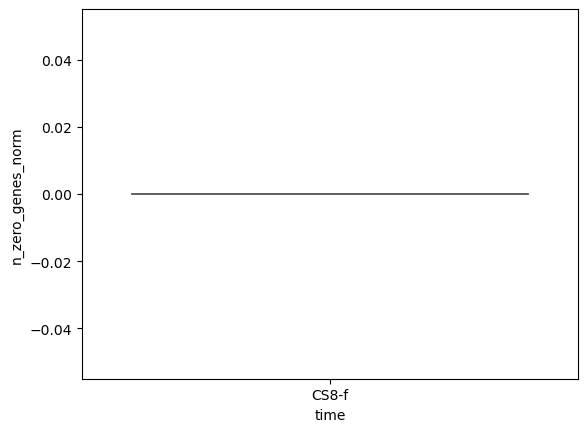

In [108]:
X = adata.X
zeros_per_cell = (X == 0).sum(axis=1)/len(adata.var.index)
adata.X.sum(axis = 1)
adata.obs['n_zero_genes_norm'] = zeros_per_cell

sns.violinplot(
    x="time",        # X轴分类变量
    y="n_zero_genes_norm", # Y轴数值变量
    data=adata.obs,      # 数据源
    palette="Set1", # 颜色方案
    inner="quartile", # 内部显示四分位线（可选：'box', 'point', 'stick', None）
    cut=0,          # 限制小提琴范围（0=不超出数据范围）
    saturation=1  # 颜色饱和度
)

In [120]:
sc.pp.normalize_total(adata, target_sum=1.3e4)

In [1]:
def reduce_total_expression(matrix, target_sum=10000):
    matrix = matrix.T
    result_matrix = np.zeros_like(matrix) 
    
    for j in range(matrix.shape[1]):
        cell_data = matrix[:, j]
        
        sorted_indices = np.argsort(cell_data)[::-1]
        sorted_values = cell_data[sorted_indices]
        
        cumulative_sum = np.cumsum(sorted_values)
        k = np.argmax(cumulative_sum >= target_sum) + 1
        
        if k == 0 or cumulative_sum[k-1] < target_sum:
            k = len(sorted_values)
            
        top_indices = sorted_indices[:k]
        top_values = cell_data[top_indices]
        
        scale_factor = target_sum / np.sum(top_values)
        scaled_values = top_values * scale_factor
        result_matrix[top_indices, j] = scaled_values
    
    return result_matrix.T

In [121]:
adata.X = reduce_total_expression(adata.X, target_sum=1e4)

/tmp/ipykernel_17413/1815230192.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='time', ylabel='n_zero_genes_norm'>

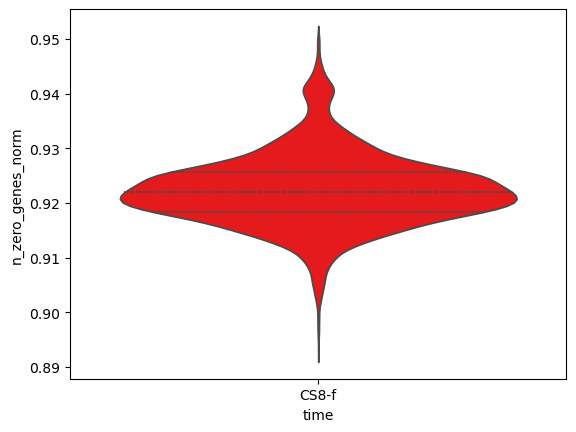

In [122]:
X = adata.X
zeros_per_cell = (X == 0).sum(axis=1)/len(adata.var.index)
adata.X.sum(axis = 1)
adata.obs['n_zero_genes_norm'] = zeros_per_cell

sns.violinplot(
    x="time",        # X轴分类变量
    y="n_zero_genes_norm", # Y轴数值变量
    data=adata.obs,      # 数据源
    palette="Set1", # 颜色方案
    inner="quartile", # 内部显示四分位线（可选：'box', 'point', 'stick', None）
    cut=2,          # 限制小提琴范围（0=不超出数据范围）
    saturation=1  # 颜色饱和度
)

In [126]:
adata.write_h5ad('/slurm/home/yrd/liaolab/caohaoxue/embryo_work/simulation_sc/CS8f_VAE_normalizedX_euc_lr1e4_1.3e4.h5ad')

In [124]:
adata_combined = sc.concat([adata_real[adata_real.obs.time.isin (['CS7','CS9'])],adata],
                         keys = ['real','fake'],
                         join = 'inner',
                         label = 'source')

/tmp/ipykernel_17413/2844085130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Axes: xlabel='time', ylabel='n_zero_genes_norm'>

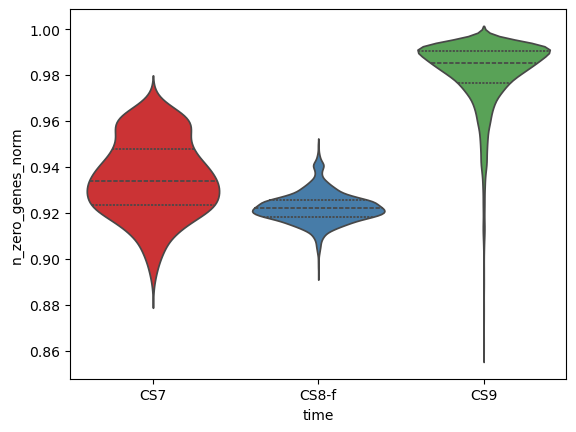

In [125]:
X = adata_combined.X
zeros_per_cell = (X == 0).sum(axis=1)/len(adata.var.index)
adata_combined.X.sum(axis = 1)
adata_combined.obs['n_zero_genes_norm'] = zeros_per_cell

sns.violinplot(
    x="time",        # X轴分类变量
    y="n_zero_genes_norm", # Y轴数值变量
    data=adata_combined.obs,      # 数据源
    palette="Set1", # 颜色方案
    inner="quartile", # 内部显示四分位线（可选：'box', 'point', 'stick', None）
    cut=2,          # 限制小提琴范围（0=不超出数据范围）
    saturation=0.75 # 颜色饱和度
)